Homework
Group: M80-107M-22
Student: Chernyshev Dmitry
Date: 19.12.2022

In [ ]:
! pip install  ncon
# https://qudata.com/ml/ru/NN_Base_Numpy.html - numpy и тензоры - полезная ссылка

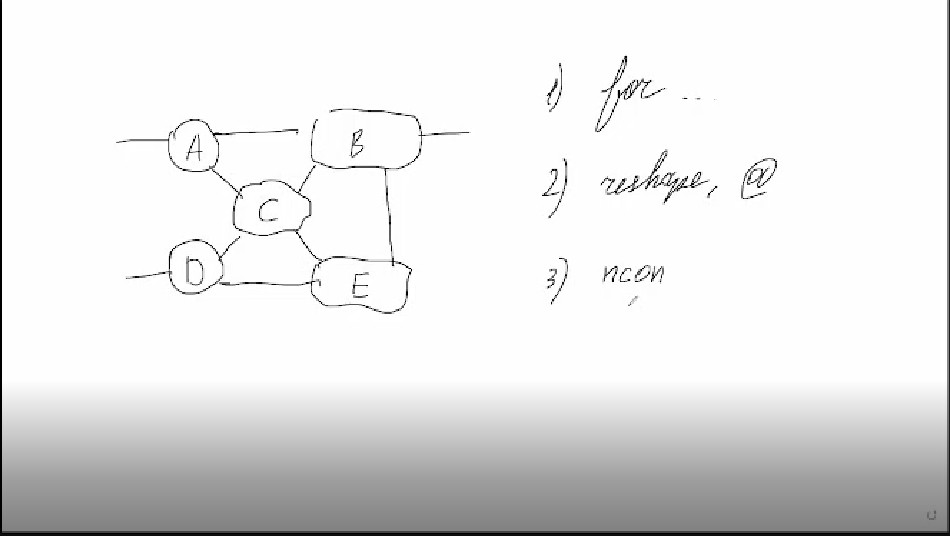

In [40]:
import numpy as np
from ncon import ncon
import time

In [66]:
# инициализация тензоров
I1 = 8
A1 = 8
F1 = 8

k1 = 1
k2 = 2
k3 = 3
k4 = 4

j = 5
l1 = 6
m1 = 7

A = np.random.uniform(-1,1,(I1,j ,k1)) # тензор А (I,j,k1)
B = np.random.uniform(-1,1,(j ,F1,l1,k2)) # тензор B (j,F,l1,k2)

C = np.random.uniform(-1,1,(k1,k2,k3,k4)) # тензор C (k1,k2,k3,k4)

D = np.random.uniform(-1,1, (A1,k3,m1)) # тензор D (A1,k3,m1)
E = np.random.uniform(-1,1,(m1,k4,l1)) # тензор E (m1,k4,l1)

print(f'A.shape {A.shape }')
print(f'B.shape {B.shape }')
print(f'C.shape {C.shape }')
print(f'D.shape {D.shape }')
print(f'E.shape {B.shape }')

A.shape (8, 5, 1)
B.shape (5, 8, 6, 2)
C.shape (1, 2, 3, 4)
D.shape (8, 3, 7)
E.shape (5, 8, 6, 2)


In [68]:
# проводим свертку
# ВАРИАНТ 1
# ncon ncon(L, v, order=None, forder=None, check_indices=True):
start_ncon = time.time()
result_ncon = ncon(
    (
        A, 
        B, 
        C, 
        D, 
        E
     ), 
    (
        [-1, 2, 1], # тензор А (I,j,k1)
        [2, -2,5 , 3], # тензор B (j,F,l1,k2) 
        [1, 3, 6, 4], # тензор C (k1,k2,k3,k4) 
        [-3, 6, 7 ], # тензор D (A,k3,m1)
        [ 7, 4,5 ] # тензор E (m1,k4,l1)
     )
)
print(time.time() - start_ncon)
print(f'result_ncon.shape = {result_ncon.shape}')
print(result_ncon)

0.002044200897216797
result_ncon.shape = (8, 8, 8)
[[[  1.86191759   6.93099589  -6.27346482   8.46688806   2.93117138
    -6.60866695  -5.14559229   6.2033548 ]
  [ -7.55202226  -1.46327001   1.66386279  10.12704837  -2.39585086
     5.67076398 -11.75430451   7.32779158]
  [ 11.07800286   1.69008208  -6.71380957  10.87647249   5.57378519
    -6.20091111   0.61973232   2.06430605]
  [  7.77835832   7.37799905   9.84554802 -15.47784545  10.05340162
    -6.25468507   4.10008208  -0.8977801 ]
  [ -0.07567305 -11.11234081  -0.50821419  -6.64623556  10.37806631
    -6.84011942  -6.83674758  -0.68412754]
  [ -0.64571273   8.52781808 -12.37160985   7.72561721  -4.02720311
    -8.61024636  12.38874368  -3.45546148]
  [  2.5070671   -0.67034936   5.67796368 -12.19408068 -10.4161932
     7.40069598  14.13343043  -7.15548545]
  [-15.02860501  -0.51249943  15.39743766 -21.01615459  -1.48737288
     6.09971649   3.0522016   -3.06411561]]

 [[  0.73171196  -1.05496995  -7.02164006  10.43957587   6.2

In [70]:
# ВАРИАНТ 2 
# np.tensordot np.tensordot(A, B, axes = (axes_A, axes_B))

start_tensordot  = time.time()
#####(1)#####
AC_1 = np.tensordot(
    A,C, 
    axes=([2],[0])
)
print(f'AC_1.shape = {AC_1.shape}')
#####(2)#####
ACB_1 = np.tensordot(
    AC_1,B, 
    axes=([1,2],[0,-1])
)
print(f'ACB_1.shape = {ACB_1.shape}')
#####(3)#####
ACBE_1 = np.tensordot(
    ACB_1,E, 
    axes=([2,-1],[-2,-1])
)
print(f'ACBE_1.shape = {ACBE_1.shape}')
#####(4)#####
result_Tensordot = np.tensordot(
    ACBE_1,D, 
    axes=([1,-1],[-2,-1])
)

print(time.time() - start_tensordot,'\n')
print(f'result_Tensordot.shape = {result_Tensordot.shape}')
print(f'result_Tensordot = {result_Tensordot}')

#check
print(result_ncon - result_Tensordot)

AC_1.shape = (8, 5, 2, 3, 4)
ACB_1.shape = (8, 3, 4, 8, 6)
ACBE_1.shape = (8, 3, 8, 7)
0.003968000411987305 

result_Tensordot.shape = (8, 8, 8)
result_Tensordot = [[[  1.86191759   6.93099589  -6.27346482   8.46688806   2.93117138
    -6.60866695  -5.14559229   6.2033548 ]
  [ -7.55202226  -1.46327001   1.66386279  10.12704837  -2.39585086
     5.67076398 -11.75430451   7.32779158]
  [ 11.07800286   1.69008208  -6.71380957  10.87647249   5.57378519
    -6.20091111   0.61973232   2.06430605]
  [  7.77835832   7.37799905   9.84554802 -15.47784545  10.05340162
    -6.25468507   4.10008208  -0.8977801 ]
  [ -0.07567305 -11.11234081  -0.50821419  -6.64623556  10.37806631
    -6.84011942  -6.83674758  -0.68412754]
  [ -0.64571273   8.52781808 -12.37160985   7.72561721  -4.02720311
    -8.61024636  12.38874368  -3.45546148]
  [  2.5070671   -0.67034936   5.67796368 -12.19408068 -10.4161932
     7.40069598  14.13343043  -7.15548545]
  [-15.02860501  -0.51249943  15.39743766 -21.01615459  -1.4

In [73]:
# ВАРИАНТ 3 
start_FOR  = time.time()
#####(1)#####
AC_3 = np.zeros((I1,j ,k2,k3,k4)) #8 5 2 3 4
for i_1 in range(I1):
  for J_0 in range(j):
    for K_2 in range(k2):
      for K_3 in range(k3):
        for K_4 in range(k4):
          #sum 
          for sumIter in range(k1): 
            #print(sumIter)
            AC_3[i_1,J_0 ,K_2,K_3,K_4] = AC_3[i_1,J_0 ,K_2,K_3,K_4] +  \
            A[i_1][J_0][sumIter] * C[sumIter][K_2][K_3][K_4]
print(f"AC_3.shape = {AC_3.shape}")
#####(2)#####
ACB_3 = np.zeros((I1,k3,k4,F1,l1))
for i_1 in range(I1):
  for K_3 in range(k3):
    for K_4 in range(k4):
      for f_1 in range(F1):
        for L_1 in range(l1):
          #sum
          for sumIter1 in range(j):
            for sumIter2 in range(k2):  
                ACB_3[i_1,K_3,K_4,f_1,L_1] = ACB_3[i_1,K_3,K_4,f_1,L_1] + \
                 AC_3[i_1,sumIter1,sumIter2,K_3,K_4] * B[sumIter1 ,f_1,L_1,sumIter2]

print(f"ACB_3.shape = {ACB_3.shape}")
#####(3)#####
ACBE_3 = np.zeros((I1,k3,F1,m1)) #= (8, 3, 4, 8, 6)  ()
# ACB_3
for i_1 in range(I1):
  for K_3 in range(k3):
      for f_1 in range(F1):
            for M_1 in range(m1):
              for sumIter1 in range(k4):
                  for sumIter2 in range(l1):
                            ACBE_3[i_1,K_3,f_1,M_1] = ACBE_3[i_1,K_3,f_1,M_1] + \
                            ACB_3[i_1,K_3,sumIter1,f_1,sumIter2] * E[M_1,sumIter1,sumIter2]

print(f"ACBE_3.shape = {ACBE_3.shape}")
####(4)#####
result_For  = np.zeros((I1,F1,A1))
for i_1 in range(I1):
  for f_1 in range(F1):
    for a_1 in range(A1):
      for sumIter1 in range(k3):
          for sumIter2 in range(m1):  #D (A,k3,m1)
              result_For[i_1,f_1,a_1] =  result_For[i_1,f_1,a_1] + \
              ACBE_3[i_1,sumIter1,f_1,sumIter2] + D[a_1,sumIter1,sumIter2]

print(f"result_For.shape = {result_For.shape}")
print(time.time() - start_FOR,'\n')

#print(f'result_For = {result_For}')

#check
print(result_ncon - result_For)

AC_3.shape = (8, 5, 2, 3, 4)
ACB_3.shape = (8, 3, 4, 8, 6)
ACBE_3.shape = (8, 3, 8, 7)
result_For.shape = (8, 8, 8)
0.13556694984436035 

[[[ 2.96756248e+00  6.58611245e+00 -7.09308248e+00  7.67553459e+00
    6.84269700e+00 -8.95209848e+00 -5.19418651e+00  5.24129187e+00]
  [-2.86867529e+01 -2.40485290e+01 -2.13961304e+01 -1.29046806e+01
   -2.07247008e+01 -1.89130431e+01 -3.40432743e+01 -1.58746469e+01]
  [ 2.66604958e+01  1.58220466e+01  6.94342077e+00  2.45619670e+01
    2.39621588e+01  5.93250536e+00  1.50479861e+01  1.55790911e+01]
  [ 4.52128278e+01  4.33619402e+01  4.53547549e+01  2.00596257e+01
    5.02937518e+01  2.77307080e+01  4.03803124e+01  3.44689816e+01]
  [ 9.54597716e+00 -2.94121894e+00  7.18817347e+00  1.07841630e+00
    2.28055973e+01 -6.67545629e-01  1.63066351e+00  6.86981485e+00]
  [ 3.32536698e+00  1.10483694e+01 -1.03257927e+01  9.79969856e+00
    2.74975734e+00 -8.08824307e+00  1.52055843e+01 -1.55208959e+00]
  [-1.36290726e+01 -1.82570174e+01 -1.23834385e+01 -

Из всего можно сделать выводы:
* Самый практичный способ - ncon;
* Самый затратный через -  цикл for